In [1]:
import pandas as pd
laptop_df = pd.read_csv('laptop_data.csv', encoding='latin1')
print(laptop_df.head())

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [2]:
# Eksplorasi data: info umum dan cek missing values
print(laptop_df.info())
print(laptop_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_in_euros    1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenRe

In [3]:
# Salin dataframe untuk pembersihan
df_clean = laptop_df.copy()

# 1. Hapus kolom ID
df_clean.drop(columns=['laptop_ID'], inplace=True)
# 2. Ubah kolom 'Ram' dan 'Weight' menjadi numerik
df_clean['Ram'] = df_clean['Ram'].str.replace('GB', '').astype(int)
df_clean['Weight'] = df_clean['Weight'].str.replace('kg', '').astype(float)
# 3. Pisahkan 'Cpu' menjadi kolom 'Cpu_brand' dan 'Cpu_model'
df_clean['Cpu_brand'] = df_clean['Cpu'].apply(lambda x: x.split()[0])
df_clean['Cpu_model'] = df_clean['Cpu'].apply(lambda x: ' '.join(x.split()[1:3]))
# 4. Pisahkan 'Gpu' menjadi kolom 'Gpu_brand'
df_clean['Gpu_brand'] = df_clean['Gpu'].apply(lambda x: x.split()[0])
# 5. Pisahkan 'Memory' menjadi dua kolom: 'SSD' dan 'HDD'
import re

def extract_memory(mem):
    mem = mem.upper().replace(' ', '')
    ssd = hdd = flash = hybrid = 0
    parts = mem.split('+')
    for part in parts:
        if 'SSD' in part:
            ssd += int(re.findall(r'(\d+)', part)[0])
        elif 'HDD' in part:
            hdd += int(re.findall(r'(\d+)', part)[0])
        elif 'FLASH' in part:
            flash += int(re.findall(r'(\d+)', part)[0])
        elif 'HYBRID' in part:
            hybrid += int(re.findall(r'(\d+)', part)[0])
    return pd.Series([ssd, hdd, flash, hybrid])

df_clean[['SSD', 'HDD', 'Flash', 'Hybrid']] = df_clean['Memory'].apply(extract_memory)
# 6. Hilangkan kolom yang sudah dipecah
df_clean.drop(columns=['Cpu', 'Gpu', 'Memory'], inplace=True)
# 7. Ubah string menjadi lowercase untuk konsistensi
for col in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'OpSys', 'Cpu_brand', 'Cpu_model', 'Gpu_brand']:
    df_clean[col] = df_clean[col].str.lower()
    # 8. Cek missing values
missing_values = df_clean.isnull().sum()

df_clean.head(), missing_values[missing_values > 0]

(  Company      Product   TypeName  Inches                    ScreenResolution  \
 0   apple  macbook pro  ultrabook    13.3  ips panel retina display 2560x1600   
 1   apple  macbook air  ultrabook    13.3                            1440x900   
 2      hp       250 g6   notebook    15.6                   full hd 1920x1080   
 3   apple  macbook pro  ultrabook    15.4  ips panel retina display 2880x1800   
 4   apple  macbook pro  ultrabook    13.3  ips panel retina display 2560x1600   
 
    Ram  OpSys  Weight  Price_in_euros Cpu_brand Cpu_model Gpu_brand  SSD  HDD  \
 0    8  macos    1.37         1339.69     intel   core i5     intel  128    0   
 1    8  macos    1.34          898.94     intel   core i5     intel    0    0   
 2    8  no os    1.86          575.00     intel   core i5     intel  256    0   
 3   16  macos    1.83         2537.45     intel   core i7       amd  512    0   
 4    8  macos    1.37         1803.60     intel   core i5     intel  256    0   
 
    Flash  H

In [4]:
# Menambahkan kolom harga dalam mata uang IDR (Rupiah)
# Asumsi kurs 1 Euro = 17.000 IDR (bisa diubah sesuai kurs terbaru)
KURS_EURO_TO_IDR = 17000
df_clean['Price_in_IDR'] = df_clean['Price_in_euros'] * KURS_EURO_TO_IDR

# Tampilkan 5 baris pertama untuk melihat hasilnya
print(df_clean.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   apple  macbook pro  ultrabook    13.3  ips panel retina display 2560x1600   
1   apple  macbook air  ultrabook    13.3                            1440x900   
2      hp       250 g6   notebook    15.6                   full hd 1920x1080   
3   apple  macbook pro  ultrabook    15.4  ips panel retina display 2880x1800   
4   apple  macbook pro  ultrabook    13.3  ips panel retina display 2560x1600   

   Ram  OpSys  Weight  Price_in_euros Cpu_brand Cpu_model Gpu_brand  SSD  HDD  \
0    8  macos    1.37         1339.69     intel   core i5     intel  128    0   
1    8  macos    1.34          898.94     intel   core i5     intel    0    0   
2    8  no os    1.86          575.00     intel   core i5     intel  256    0   
3   16  macos    1.83         2537.45     intel   core i7       amd  512    0   
4    8  macos    1.37         1803.60     intel   core i5     intel  256    0   

   Flash  Hybrid  Price_in

In [5]:
df_clean = df_clean.drop_duplicates()

In [6]:
df_clean.duplicated().sum()

0

In [7]:
def remove_outliers_iqr(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

In [8]:
# Hitung PPI jika belum
df_clean[['x_res', 'y_res']] = df_clean['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(float)
df_clean['ppi'] = ((df_clean['x_res']**2 + df_clean['y_res']**2)**0.5) / df_clean['Inches']

# Hapus outlier dari beberapa kolom penting
for col in ['Price_in_IDR', 'Ram', 'Inches', 'ppi', 'SSD', 'HDD']:
    df_clean = remove_outliers_iqr(df_clean, col)

df_clean.reset_index(drop=True, inplace=True)

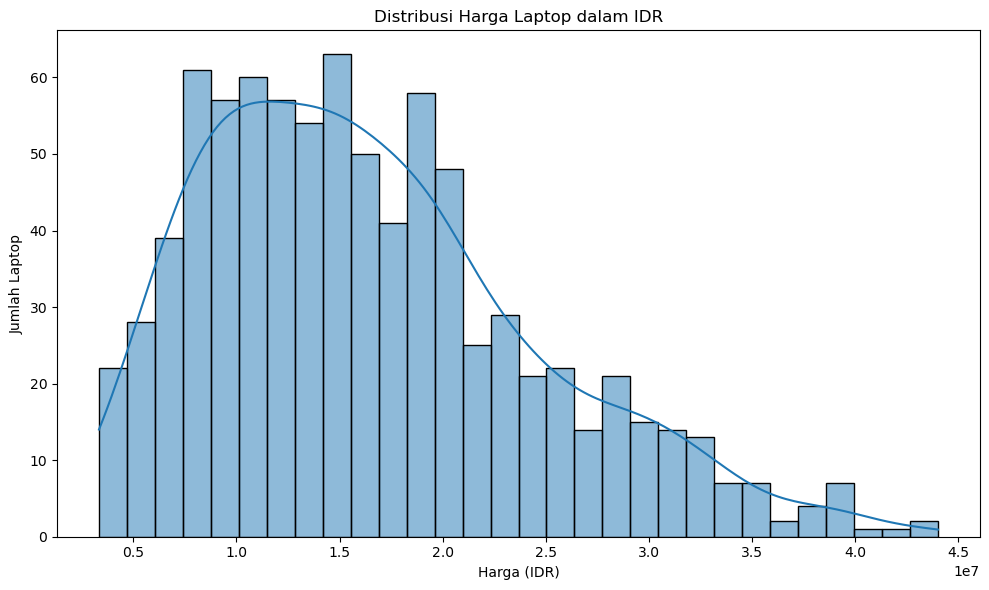

count    8.430000e+02
mean     1.643610e+07
std      8.044186e+06
min      3.332000e+06
25%      1.016600e+07
50%      1.523200e+07
75%      2.069223e+07
max      4.403000e+07
Name: Price_in_IDR, dtype: float64


In [9]:
# Visualisasi distribusi harga laptop dalam IDR
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_clean['Price_in_IDR'], bins=30, kde=True)
plt.title('Distribusi Harga Laptop dalam IDR')
plt.xlabel('Harga (IDR)')
plt.ylabel('Jumlah Laptop')
plt.tight_layout()
plt.show()

# Tampilkan statistik harga dalam IDR
print(df_clean['Price_in_IDR'].describe())

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Pilih fitur dan target
features = ['Company', 'TypeName', 'Inches', 'Ram', 'Weight', 'SSD', 'HDD', 'OpSys']
target = 'Price_in_IDR'

# Encode fitur kategorikal
le_company = LabelEncoder()
df_clean['Company_enc'] = le_company.fit_transform(df_clean['Company'])

le_type = LabelEncoder()
df_clean['TypeName_enc'] = le_type.fit_transform(df_clean['TypeName'])

le_opsys = LabelEncoder()
df_clean['OpSys_enc'] = le_opsys.fit_transform(df_clean['OpSys'])

# Gunakan fitur yang sudah diencoding + numerik
X = df_clean[['Company_enc', 'TypeName_enc', 'Inches', 'Ram', 'Weight', 'SSD', 'HDD', 'OpSys_enc']]
y = df_clean[target]

# Split data tanpa scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gabungkan kembali untuk TF-DF
X_train_df = X_train.copy()
X_train_df[target] = y_train

X_test_df = X_test.copy()
X_test_df[target] = y_test


<Axes: xlabel='Price_in_IDR', ylabel='Count'>

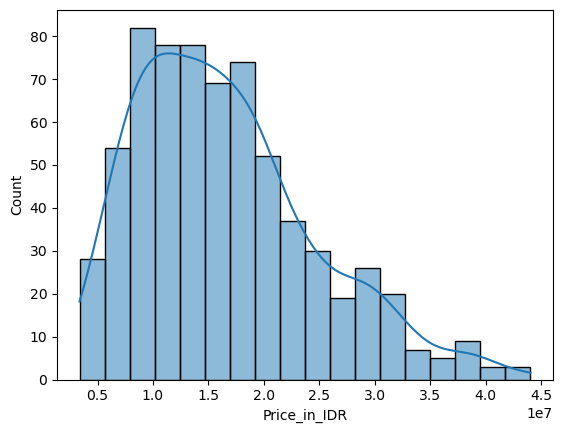

In [11]:
import seaborn as sns
sns.histplot(y_train, kde=True)

## coba tensor flow

In [12]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
import pandas as pd

In [13]:
X_train_df = X_train.copy()
X_test_df = X_test.copy()

X_train_df['Price_in_IDR'] = y_train
X_test_df['Price_in_IDR'] = y_test


In [21]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train_df, task=tfdf.keras.Task.REGRESSION, label="Price_in_IDR")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test_df, task=tfdf.keras.Task.REGRESSION, label="Price_in_IDR")


In [23]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train_df, label=target, task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test_df, label=target, task=tfdf.keras.Task.REGRESSION)

In [25]:
import pandas as pd
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split

# Pilih hanya fitur penting
selected_features = ['Ram', 'Weight', 'SSD', 'TypeName_enc', 'OpSys_enc']
target = 'Price_in_IDR'

# Buat subset data
X_df = df_clean[selected_features + [target]]

# Split data train-test
X_train_df, X_test_df = train_test_split(X_df, test_size=0.2, random_state=42)

# Konversi ke tf.data.Dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train_df, label=target, task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test_df, label=target, task=tfdf.keras.Task.REGRESSION)

# Buat dan latih model TF-DF
rf_model_tfdf_simplified = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
rf_model_tfdf_simplified.fit(train_ds)

# Evaluasi model
evaluation = rf_model_tfdf_simplified.evaluate(test_ds, return_dict=True)
print("✅ TF-DF Random Forest dengan fitur penting saja")
print("RMSE (loss):", evaluation['loss'])

# Prediksi dan MAE manual
predictions = rf_model_tfdf_simplified.predict(test_ds)
y_pred = [pred[0] for pred in predictions]
y_true = X_test_df[target].values

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print("MAE (manual):", mae)


Use /var/folders/mf/d68wp8695t52xvrgzxzcwlb40000gn/T/tmpf1cyts8x as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.465621. Found 674 examples.
Training model...
Model trained in 0:00:00.152580
Compiling model...


I0000 00:00:1749614756.528456  896696 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1749614756.529028  896696 kernel.cc:783] Collect training examples
I0000 00:00:1749614756.529033  896696 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1749614756.530594  896696 kernel.cc:401] Number of batches: 1
I0000 00:00:1749614756.530599  896696 kernel.cc:402] Number of examples: 674
I0000 00:00:1749614756.531016  896696 kernel.cc:802] Training dataset:
Number of records: 674
Number of columns: 6

Number of columns by type:
	NUMERICAL: 6 (100%)

Columns:

NUMERICAL: 6 (100%)
	0: "OpSys_enc" NUMERICAL mean:4.70326 min:0 max:7 sd:1.20006
	1: "Ram" NUMERICAL mean:6.88131 min:2 max:12 sd:2.03839
	2: "SSD" NUMERICAL

Model compiled.
1/1 [==============================] - 0s 94ms/step - loss: 0.0000e+00
✅ TF-DF Random Forest dengan fitur penting saja
RMSE (loss): 0.0
1/1 [==============================] - 0s 13ms/step
MAE (manual): 3310862.1242603553


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prediksi
y_pred = rf_model_tfdf_simplified.predict(test_ds)
y_pred = [pred[0] for pred in y_pred]

# Nilai aktual
y_true = X_test_df[target].values

# Evaluasi manual
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("✅ Evaluasi Manual:")
print("MAE :", mae)
print("RMSE:", rmse)


1/1 [==============================] - 0s 49ms/step
✅ Evaluasi Manual:
MAE : 3310862.1242603553
RMSE: 4568480.201099273


1/1 [==============================] - 0s 45ms/step
   Actual Price  Predicted Price
0     5066000.0        5558334.0
1    11033000.0        9909991.0
2    20485000.0       18205170.0
3    13583000.0       17269574.0
4    28033000.0       24983662.0
5    12172000.0       12446043.0
6    13583000.0       10467208.0
7    20315000.0       21218368.0
8    11883000.0       13812481.0
9    10863000.0       11139044.0


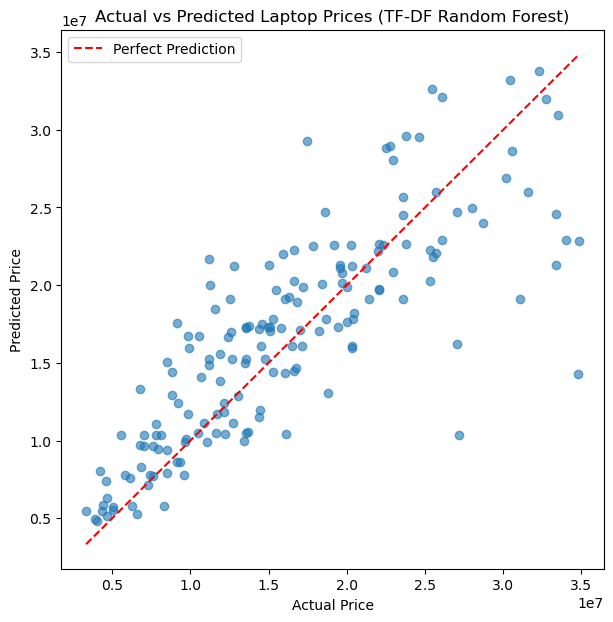

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# 🔮 Prediksi harga dari test set (pakai test_ds)
predictions = rf_model_tfdf_simplified.predict(test_ds)
y_pred = np.array([pred[0] for pred in predictions])  # ambil nilai float dari hasil prediksi

# 🎯 Harga aktual
y_true = X_test_df['Price_in_IDR'].values

# 📊 Buat DataFrame perbandingan
comparison_df = pd.DataFrame({
    'Actual Price': y_true,
    'Predicted Price': y_pred
})

# 🖨️ Tampilkan 10 hasil pertama
print(comparison_df.head(10))

# 📈 Visualisasi scatter plot
plt.figure(figsize=(7, 7))
plt.scatter(comparison_df['Actual Price'], comparison_df['Predicted Price'], alpha=0.6)
plt.plot(
    [comparison_df['Actual Price'].min(), comparison_df['Actual Price'].max()],
    [comparison_df['Actual Price'].min(), comparison_df['Actual Price'].max()],
    color='red', linestyle='--', label='Perfect Prediction'
)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices (TF-DF Random Forest)')
plt.legend()
plt.show()


In [30]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_true, y_pred))


R2 Score: 0.6561443809011689


In [31]:
rf_model_tfdf_simplified.make_inspector().variable_importances()


{'INV_MEAN_MIN_DEPTH': [("Ram" (1; #1), 0.4595618464492418),
  ("SSD" (1; #2), 0.3235010086622343),
  ("Weight" (1; #4), 0.31389962727181986),
  ("TypeName_enc" (1; #3), 0.27345024623706404),
  ("OpSys_enc" (1; #0), 0.16321647134018666)],
 'NUM_AS_ROOT': [("Ram" (1; #1), 163.0),
  ("SSD" (1; #2), 75.0),
  ("TypeName_enc" (1; #3), 40.0),
  ("Weight" (1; #4), 22.0)],
 'SUM_SCORE': [("Ram" (1; #1), 3.2660173122836337e+18),
  ("Weight" (1; #4), 3.225135256404047e+18),
  ("TypeName_enc" (1; #3), 2.1026467574256417e+18),
  ("SSD" (1; #2), 2.008423401376491e+18),
  ("OpSys_enc" (1; #0), 3.92110165991046e+17)],
 'NUM_NODES': [("Weight" (1; #4), 18485.0),
  ("SSD" (1; #2), 2617.0),
  ("TypeName_enc" (1; #3), 2370.0),
  ("OpSys_enc" (1; #0), 2329.0),
  ("Ram" (1; #1), 1279.0)]}

In [33]:
rf_model_tfdf_simplified.save("tfdf_model_laptop")


INFO:tensorflow:Assets written to: tfdf_model_laptop/assets


INFO:tensorflow:Assets written to: tfdf_model_laptop/assets


In [35]:
rf_model_tfdf_simplified.save("new_ydf_model")

INFO:tensorflow:Assets written to: new_ydf_model/assets


INFO:tensorflow:Assets written to: new_ydf_model/assets
